#Qual o próximo hit do Spotify?
###Instalações iniciais

In [2]:
pip install pandas
pip install numpy
pip install matplotlib
pip install seaborn
pip install scikit-learn
pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 6.0 MB/s eta 0:00:00


##Biblioecas Utilizadas

In [3]:
# Importando bibliotecas para manipulação de dados
import pandas as pd  # Manipulação de dataframes
import numpy as np  # Operações matemáticas e manipulação de arrays e matrizes

# Importando bibliotecas para visualização de dados
import matplotlib.pyplot as plt  # Biblioteca para criação de gráficos
import seaborn as sns  # Biblioteca para visualização de dados com gráficos estilizados

# Importando bibliotecas de avaliação de modelos e preprocessamento
from sklearn.preprocessing import StandardScaler  # Normalização e padronização de dados
from sklearn.metrics import r2_score  # Métrica R² para avaliação da qualidade do ajuste de modelos
from sklearn.metrics import mean_squared_error, mean_absolute_error  # Métricas MSE e MAE para avaliar erros de modelos
from sklearn.model_selection import train_test_split  # Divisão do dataset em conjuntos de treino e teste
from sklearn.model_selection import learning_curve  # Ferramenta para criação de curvas de aprendizado
from sklearn.model_selection import GridSearchCV  # Busca em grade para otimização de hiperparâmetros
from sklearn.tree import DecisionTreeClassifier  # Algoritmo de classificação baseado em árvores de decisão
from sklearn.model_selection import cross_val_score  # Validação cruzada para medir a performance de um modelo
from sklearn.feature_selection import SelectKBest, chi2  # Seleção de features usando o teste qui-quadrado
from sklearn.feature_selection import RFE  # Recursão de eliminação de features (Recursive Feature Elimination)
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix  # Métricas de avaliação de classificação
from statsmodels.stats.outliers_influence import variance_inflation_factor  # Métrica para calcular o VIF (fator de inflação da variância)
from sklearn.preprocessing import LabelEncoder  # Codificação de variáveis categóricas em variáveis numéricas

# Importando os modelos de machine learning
from sklearn.cluster import KMeans  # Algoritmo de clustering K-means
from sklearn.neighbors import KNeighborsRegressor  # Algoritmo de regressão K-vizinhos mais próximos
from sklearn.tree import DecisionTreeRegressor  # Algoritmo de regressão baseado em árvore de decisão
from sklearn.ensemble import RandomForestRegressor  # Algoritmo de Regressão por Florestas Aleatórias (Random Forest)
from sklearn.ensemble import VotingRegressor, StackingRegressor  # Algoritmos ensemble para regressão (Voting e Stacking)


## Carregamento e Exploração Inicial dos Dados
Neste trecho do código, carregamos o arquivo train.csv para um DataFrame utilizando a biblioteca pandas. Em seguida, os primeiros registros do DataFrame são exibidos com o comando print(df.head()), permitindo uma visualização inicial dos dados. O método df.info() é utilizado para apresentar informações sobre o DataFrame, como o número de entradas, tipos de dados e se existem valores nulos.

Isso permite uma rápida inspeção da estrutura e qualidade dos dados antes de prosseguir com o pré-processamento e a modelagem.

In [64]:
# Carrega os dados de um arquivo para um DataFrame do pandas
df = pd.read_csv('train.csv')
df.head(5)

   track_unique_id                track_id            artists  \
0            41996  7hUhmkALyQ8SX9mJs5XI3D   Love and Rockets   
1            76471  5x59U89ZnjZXuNAAlc8X1u   Filippa Giordano   
2            54809  70Vng5jLzoJLmeLu3ayBQq      Susumu Yokota   
3            16326  1cRfzLJapgtwJ61xszs37b  Franz Liszt;YUNDI   
4           109799  47d5lYjbiMy0EdMRV8lRou            Scooter   

             album_name                              track_name  duration_ms  \
0      Love and Rockets                              Motorcycle       211533   
1      Filippa Giordano  Addio del passato - From "La traviata"       196000   
2                Symbol                      Purple Rose Minuet       216506   
3  Relajación y siestas            Liebeslied (Widmung), S. 566       218346   
4       Scooter Forever                            The Darkside       173160   

   explicit  danceability  energy  key  ...  mode  speechiness  acousticness  \
0     False         0.305  0.8490    9  ...     

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79800 entries, 0 to 79799
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   track_unique_id    79800 non-null  int64  
 1   track_id           79800 non-null  object 
 2   artists            79800 non-null  object 
 3   album_name         79800 non-null  object 
 4   track_name         79800 non-null  object 
 5   duration_ms        79800 non-null  int64  
 6   explicit           79800 non-null  bool   
 7   danceability       79800 non-null  float64
 8   energy             79800 non-null  float64
 9   key                79800 non-null  int64  
 10  loudness           79800 non-null  float64
 11  mode               79800 non-null  int64  
 12  speechiness        79800 non-null  float64
 13  acousticness       79800 non-null  float64
 14  instrumentalness   79800 non-null  float64
 15  liveness           79800 non-null  float64
 16  valence            798

## Limpeza dos Dados
### Remoção de Outliers
Neste trecho, realizamos a remoção de outliers. A coluna duration_ms foi convertida de milissegundos para minutos, dividindo seus valores por 60.000. Após a conversão, utilizamos um gráfico de densidade (KDE plot) para visualizar a distribuição dos resultados para features numéricas, em seguida foram removidos valores discrepantes

### Tempo das músicas

In [6]:
df['duration_ms'] = df['duration_ms'] / 60000
print(df['duration_ms'])#agora a duração está em minutos

0        3.525550
1        3.266667
2        3.608433
3        3.639100
4        2.886000
           ...   
79795    2.710217
79796    4.001033
79797    2.271767
79798    3.614017
79799    2.120000
Name: duration_ms, Length: 79800, dtype: float64


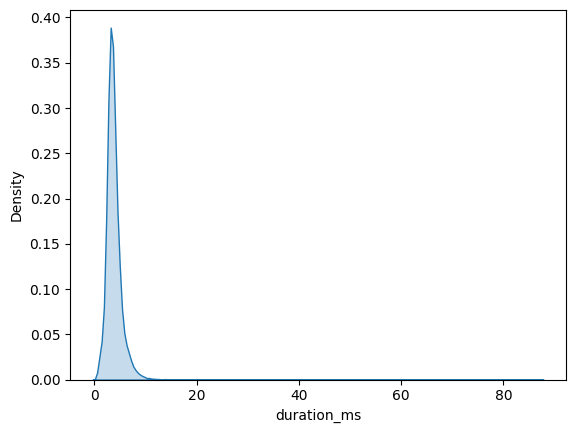

In [7]:

sns.kdeplot(df['duration_ms'], fill =True)
plt.show()

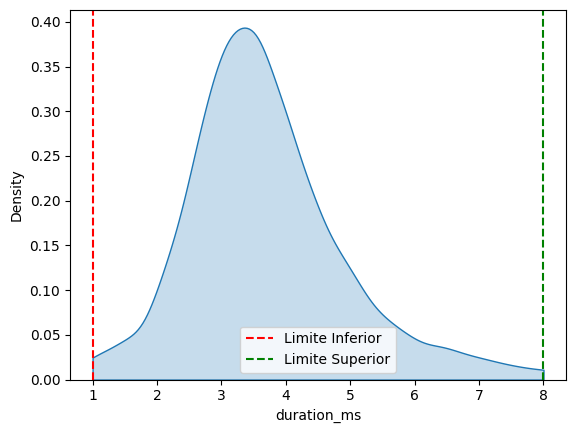

In [8]:
# Definir o intervalo que deseja visualizar
intervalo_minimo = 1
intervalo_maximo = 8

# Plotar o gráfico KDE com intervalo
sns.kdeplot(df['duration_ms'], fill=True, clip=(intervalo_minimo, intervalo_maximo))

# Adicionar linhas verticais nos limites de interesse
plt.axvline(x=intervalo_minimo, color='r', linestyle='--', label='Limite Inferior')
plt.axvline(x=intervalo_maximo, color='g', linestyle='--', label='Limite Superior')

# Adicionar legenda
plt.legend()
plt.show()

In [66]:
df = df[df['duration_ms'] <= 8]
# Exibir o DataFrame filtrado
#df = df.drop(['coluna2'], axis=1)
df['duration_ms'].head()

,duration_ms


### Dançabilidade

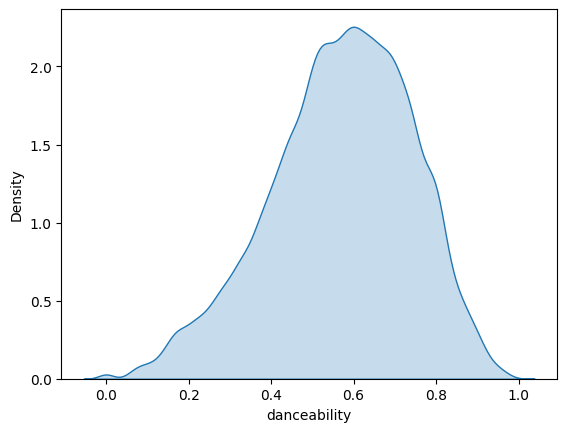

In [10]:
sns.kdeplot(df['danceability'], fill =True)
plt.show()

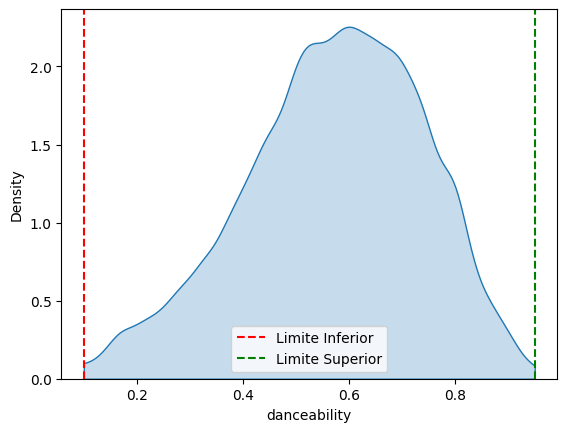

In [11]:
# Definir o intervalo que deseja visualizar
intervalo_minimo = 0.1
intervalo_maximo = 0.95

# Plotar o gráfico KDE com intervalo
sns.kdeplot(df['danceability'], fill=True, clip=(intervalo_minimo, intervalo_maximo))

# Adicionar linhas verticais nos limites de interesse
plt.axvline(x=intervalo_minimo, color='r', linestyle='--', label='Limite Inferior')
plt.axvline(x=intervalo_maximo, color='g', linestyle='--', label='Limite Superior')

# Adicionar legenda
plt.legend()
plt.show()

In [12]:
df = df[df['danceability'] >= 0.15]
df = df[df['danceability'] <= 0.95]
# Exibir o DataFrame filtrado
#df = df.drop(['coluna2'], axis=1)
print(df['danceability'])

0        0.305
1        0.287
2        0.583
3        0.163
4        0.647
         ...  
79795    0.554
79796    0.689
79797    0.629
79798    0.421
79799    0.565
Name: danceability, Length: 77397, dtype: float64


### Energia

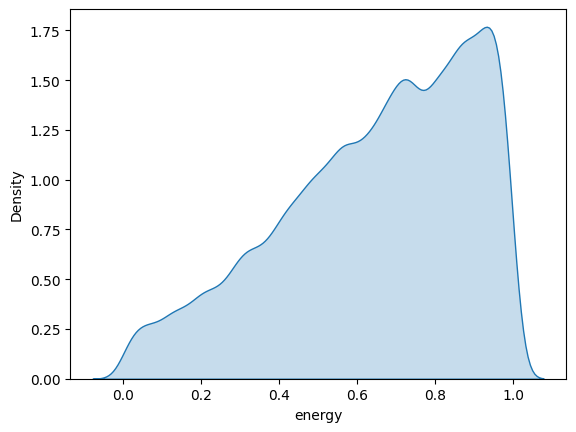

In [13]:
sns.kdeplot(df['energy'], fill =True)
plt.show()

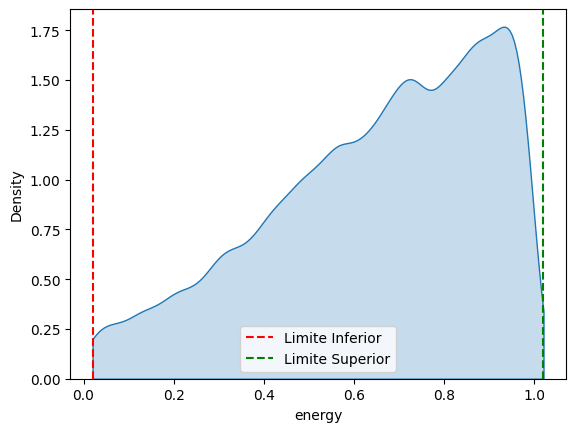

In [14]:
# Definir o intervalo que deseja visualizar
intervalo_minimo = 0.02
intervalo_maximo = 1.02

# Plotar o gráfico KDE com intervalo
sns.kdeplot(df['energy'], fill=True, clip=(intervalo_minimo, intervalo_maximo))

# Adicionar linhas verticais nos limites de interesse
plt.axvline(x=intervalo_minimo, color='r', linestyle='--', label='Limite Inferior')
plt.axvline(x=intervalo_maximo, color='g', linestyle='--', label='Limite Superior')

# Adicionar legenda
plt.legend()
plt.show()

In [15]:
df = df[df['energy'] >= 0.02]
df = df[df['energy'] <= 1.02]
# Exibir o DataFrame filtrado
#df = df.drop(['coluna2'], axis=1)
print(df['energy'])

0        0.8490
1        0.1900
2        0.5090
3        0.0368
4        0.9210
          ...  
79794    0.8780
79796    0.5540
79797    0.5600
79798    0.1070
79799    0.2400
Name: energy, Length: 77024, dtype: float64


### falabilidade

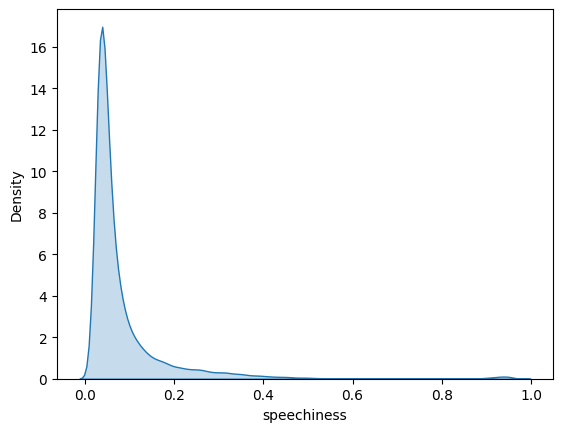

In [16]:
sns.kdeplot(df['speechiness'], fill =True)
plt.show()

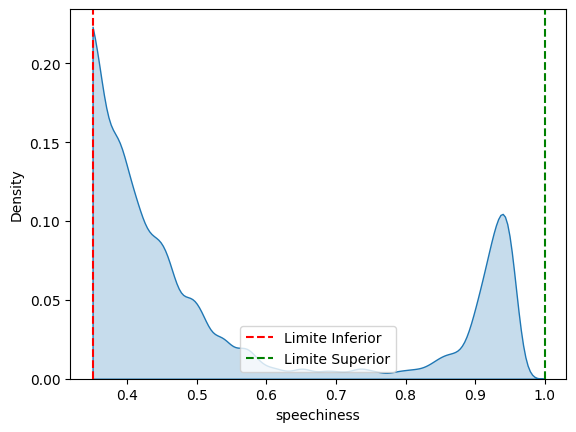

In [17]:
# Definir o intervalo que deseja visualizar
intervalo_minimo = 0.35
intervalo_maximo = 1

# Plotar o gráfico KDE com intervalo
sns.kdeplot(df['speechiness'], fill=True, clip=(intervalo_minimo, intervalo_maximo))

# Adicionar linhas verticais nos limites de interesse
plt.axvline(x=intervalo_minimo, color='r', linestyle='--', label='Limite Inferior')
plt.axvline(x=intervalo_maximo, color='g', linestyle='--', label='Limite Superior')

# Adicionar legenda
plt.legend()
plt.show()

In [18]:
df = df[df['speechiness'] <= 0.4]
# Exibir o DataFrame filtrado
#df = df.drop(['coluna2'], axis=1)
print(df['speechiness'])

0        0.0549
1        0.0370
2        0.0362
3        0.0472
4        0.1850
          ...  
79794    0.0420
79796    0.0759
79797    0.0523
79798    0.0335
79799    0.0439
Name: speechiness, Length: 75610, dtype: float64


### Acústica

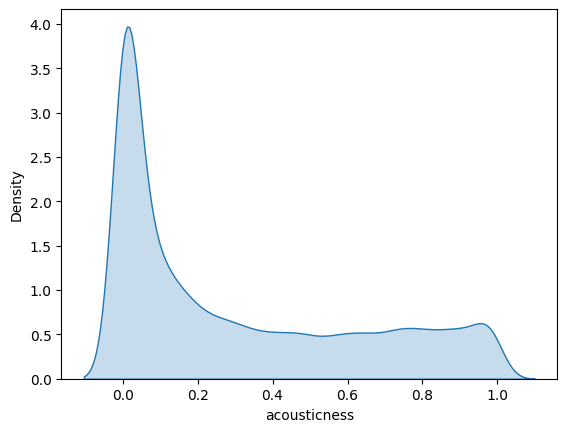

In [19]:
sns.kdeplot(df['acousticness'], fill =True)
plt.show()

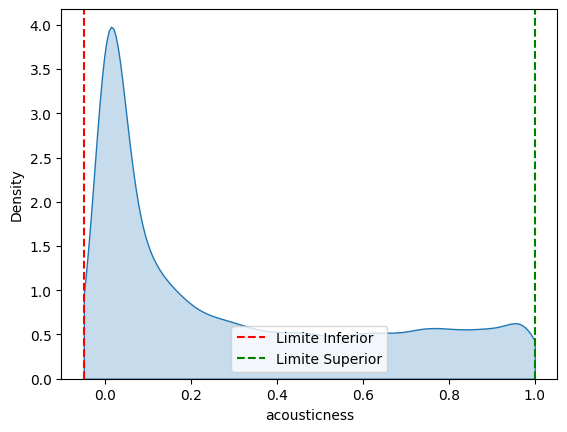

In [20]:
# Definir o intervalo que deseja visualizar
intervalo_minimo = -0.05
intervalo_maximo = 1

# Plotar o gráfico KDE com intervalo
sns.kdeplot(df['acousticness'], fill=True, clip=(intervalo_minimo, intervalo_maximo))

# Adicionar linhas verticais nos limites de interesse
plt.axvline(x=intervalo_minimo, color='r', linestyle='--', label='Limite Inferior')
plt.axvline(x=intervalo_maximo, color='g', linestyle='--', label='Limite Superior')

# Adicionar legenda
plt.legend()
plt.show()

In [21]:
df = df[df['acousticness'] >= -0.4]
df = df[df['acousticness'] <= 0.99]
# Exibir o DataFrame filtrado
#df = df.drop(['coluna2'], axis=1)
print(df['acousticness'])

0        0.000058
1        0.930000
2        0.777000
4        0.000939
5        0.002670
           ...   
79794    0.003550
79796    0.091000
79797    0.595000
79798    0.948000
79799    0.931000
Name: acousticness, Length: 74830, dtype: float64


### Instrumentalidade

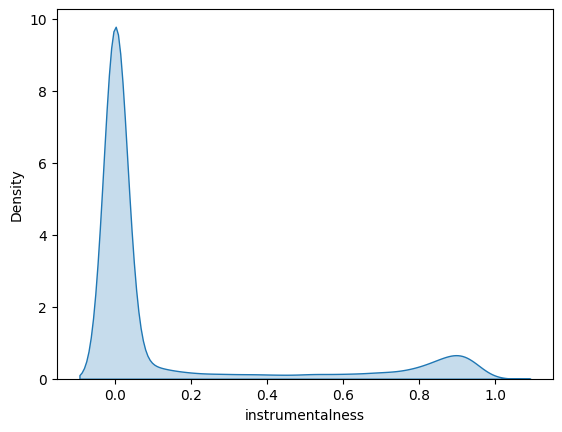

In [22]:
sns.kdeplot(df['instrumentalness'], fill =True)
plt.show()

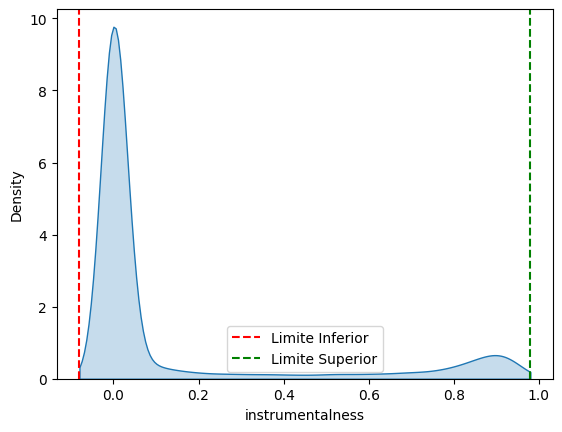

In [23]:
# Definir o intervalo que deseja visualizar
intervalo_minimo = -0.08
intervalo_maximo = 0.98

# Plotar o gráfico KDE com intervalo
sns.kdeplot(df['instrumentalness'], fill=True, clip=(intervalo_minimo, intervalo_maximo))

# Adicionar linhas verticais nos limites de interesse
plt.axvline(x=intervalo_minimo, color='r', linestyle='--', label='Limite Inferior')
plt.axvline(x=intervalo_maximo, color='g', linestyle='--', label='Limite Superior')

# Adicionar legenda
plt.legend()
plt.show()

In [24]:
df = df[df['instrumentalness'] >= -0.08]
df = df[df['instrumentalness'] <= 0.98]
# Exibir o DataFrame filtrado
#df = df.drop(['coluna2'], axis=1)
print(df['instrumentalness'])

0        0.056700
1        0.000356
2        0.202000
4        0.371000
5        0.000000
           ...   
79794    0.887000
79796    0.914000
79797    0.000000
79798    0.000000
79799    0.912000
Name: instrumentalness, Length: 74756, dtype: float64


### vivacidade

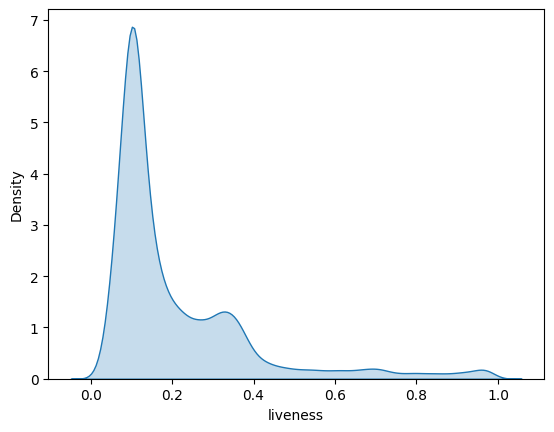

In [25]:
sns.kdeplot(df['liveness'], fill =True)
plt.show()

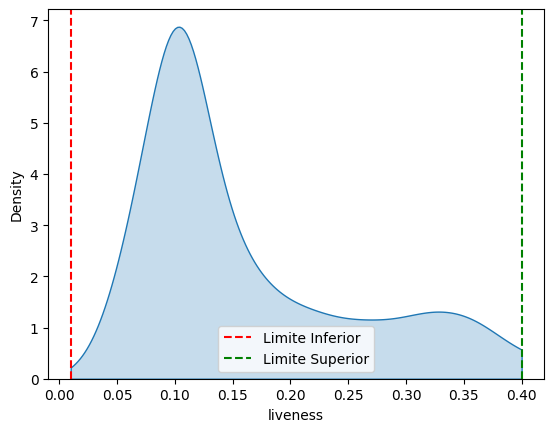

In [26]:
# Definir o intervalo que deseja visualizar
intervalo_minimo = 0.01
intervalo_maximo = 0.4

# Plotar o gráfico KDE com intervalo
sns.kdeplot(df['liveness'], fill=True, clip=(intervalo_minimo, intervalo_maximo))

# Adicionar linhas verticais nos limites de interesse
plt.axvline(x=intervalo_minimo, color='r', linestyle='--', label='Limite Inferior')
plt.axvline(x=intervalo_maximo, color='g', linestyle='--', label='Limite Superior')

# Adicionar legenda
plt.legend()
plt.show()

In [27]:
df = df[df['liveness'] >= 0.01]
df = df[df['liveness'] <= 0.6]
# Exibir o DataFrame filtrado
#df = df.drop(['coluna2'], axis=1)
print(df['liveness'])

0        0.4640
1        0.0834
2        0.1150
4        0.1310
5        0.3060
          ...  
79794    0.0984
79796    0.0867
79797    0.1820
79798    0.0881
79799    0.3790
Name: liveness, Length: 70493, dtype: float64


### Tempo

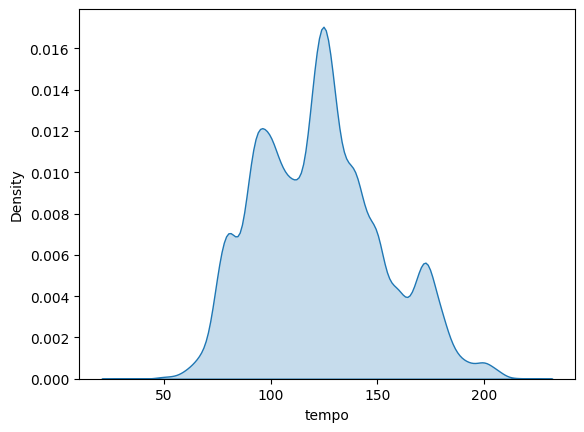

In [28]:
sns.kdeplot(df['tempo'], fill =True)
plt.show()

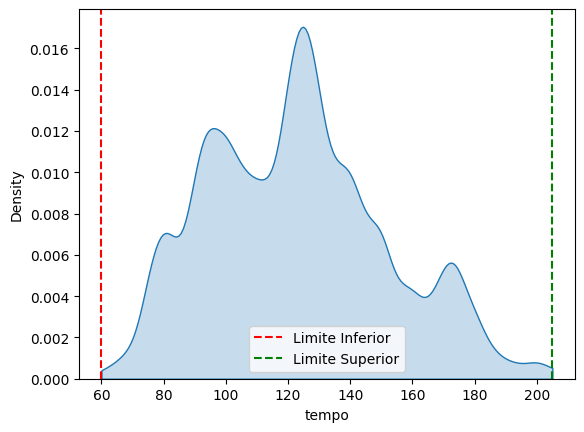

In [29]:
# Definir o intervalo que deseja visualizar
intervalo_minimo = 60
intervalo_maximo = 205

# Plotar o gráfico KDE com intervalo
sns.kdeplot(df['tempo'], fill=True, clip=(intervalo_minimo, intervalo_maximo))

# Adicionar linhas verticais nos limites de interesse
plt.axvline(x=intervalo_minimo, color='r', linestyle='--', label='Limite Inferior')
plt.axvline(x=intervalo_maximo, color='g', linestyle='--', label='Limite Superior')

# Adicionar legenda
plt.legend()
plt.show()

In [30]:
df = df[df['tempo'] >= 60]
df = df[df['tempo'] <= 205]
# Exibir o DataFrame filtrado
#df = df.drop(['coluna2'], axis=1)
print(df['tempo'])

0        141.793
1         83.685
2         90.459
4        137.981
5         77.502
          ...   
79794    126.028
79796    148.002
79797    118.895
79798    104.218
79799    114.930
Name: tempo, Length: 70205, dtype: float64


### Valência

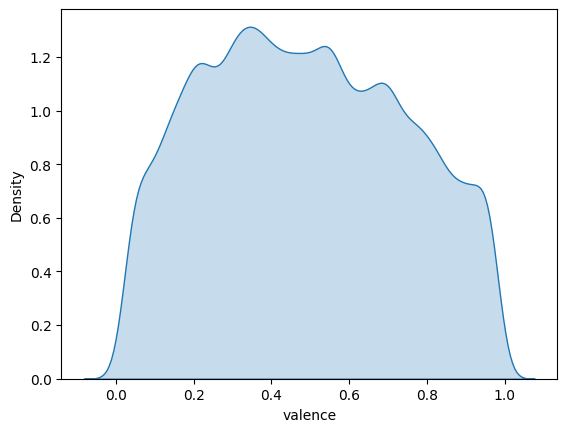

In [31]:
sns.kdeplot(df['valence'], fill =True)
plt.show()

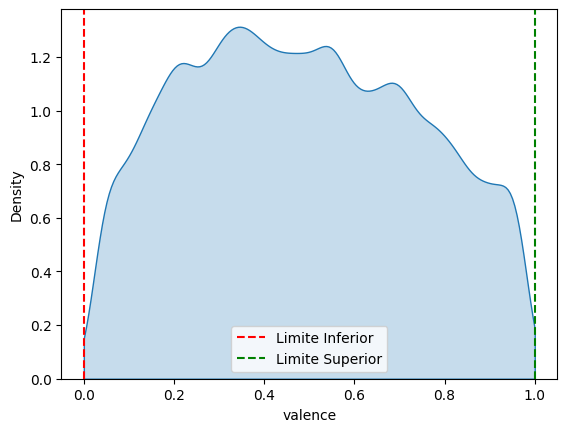

In [32]:
# Definir o intervalo que deseja visualizar
intervalo_minimo = 0
intervalo_maximo = 1

# Plotar o gráfico KDE com intervalo
sns.kdeplot(df['valence'], fill=True, clip=(intervalo_minimo, intervalo_maximo))

# Adicionar linhas verticais nos limites de interesse
plt.axvline(x=intervalo_minimo, color='r', linestyle='--', label='Limite Inferior')
plt.axvline(x=intervalo_maximo, color='g', linestyle='--', label='Limite Superior')

# Adicionar legenda
plt.legend()
plt.show()

In [33]:
df = df[df['valence'] >= 0]
df = df[df['valence'] <= 1]
# Exibir o DataFrame filtrado
#df = df.drop(['coluna2'], axis=1)
print(df['valence'])

0        0.3200
1        0.1330
2        0.5440
4        0.1710
5        0.3450
          ...  
79794    0.6650
79796    0.1630
79797    0.8800
79798    0.1180
79799    0.0827
Name: valence, Length: 70205, dtype: float64


In [34]:
df = df.dropna()
df.head(10)

,track_unique_id,track_id,artists,album_name,track_name,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,popularity_target
0,41996,7hUhmkALyQ8SX9mJs5XI3D,Love and Rockets,Love and Rockets,Motorcycle,3.525550,False,0.305,0.849,9,...,1,0.0549,0.000058,0.056700,0.4640,0.320,141.793,4,goth,0
1,76471,5x59U89ZnjZXuNAAlc8X1u,Filippa Giordano,Filippa Giordano,"Addio del passato - From ""La traviata""",3.266667,False,0.287,0.190,7,...,0,0.0370,0.930000,0.000356,0.0834,0.133,83.685,4,opera,0
2,54809,70Vng5jLzoJLmeLu3ayBQq,Susumu Yokota,Symbol,Purple Rose Minuet,3.608433,False,0.583,0.509,1,...,1,0.0362,0.777000,0.202000,0.1150,0.544,90.459,3,idm,1
4,109799,47d5lYjbiMy0EdMRV8lRou,Scooter,Scooter Forever,The Darkside,2.886000,False,0.647,0.921,2,...,1,0.1850,0.000939,0.371000,0.1310,0.171,137.981,4,techno,0
5,81987,6m1TWFMeon7ai9XLOzdbiR,BTS,Love Yourself 轉 'Tear',FAKE LOVE,4.038883,False,0.557,0.719,2,...,0,0.0371,0.002670,0.000000,0.3060,0.345,77.502,4,pop,1
6,861,2hVaNGGvdvvzRPCK9BUZmA,Rosie Thomas;The Shins;Sufjan Stevens;Josh Ottum,Always Be My Baby,Always Be My Baby,4.238433,False,0.516,0.311,1,...,1,0.0306,0.936000,0.000281,0.1070,0.558,129.958,4,acoustic,1
7,105691,4XnOAcX5K9XojJC5o0MlqT,"Sarah, the Illstrumentalist",No Traffic in LA,Finally Out,2.177233,False,0.725,0.632,6,...,0,0.0358,0.103000,0.951000,0.0847,0.312,122.983,4,study,0
8,105515,0wwa9lg3yCKyyOkJLAEtod,Waveum,In The Third Move,Limewire,1.329400,False,0.830,0.261,11,...,1,0.1000,0.638000,0.934000,0.1140,0.341,85.009,4,study,0
9,110527,2spyaDFRS112FVYq9UZ6Xu,Dj T.H.;Mitraz,Chasing Stars,Chasing Stars - Extended Mix,5.906250,False,0.669,0.918,0,...,0,0.0470,0.000981,0.026100,0.5210,0.370,129.984,4,trance,0
10,83800,569BGSWQapYD8Niuy67Cal,Seven Lions;Blastoyz;Fiora,After Dark (feat. Fiora),After Dark (feat. Fiora),3.830983,False,0.558,0.976,1,...,0,0.1250,0.003160,0.380000,0.1660,0.301,142.003,4,progressive-house,1


### Remoção de colunas desnecessárias e formatação dos dados
Nessa sessão, as colunas track_id','album_name','track_name, foram removidas por não serem relevantes para o treinamento do modelo. as colunas Explicit, por ser uma booleana string, foi transformada em uma booleana numérica(0 ou 1). Além disso a coluna de duração teve suas casas decimais reduzidas para apenas uma.

In [35]:
df = df.drop(['track_id','album_name','track_name'], axis=1)
df['duration_ms'] = df['duration_ms'].apply(lambda x: round(x, 1))

In [36]:
df['explicit'] = df['explicit'].replace({True: 1, False: 0})
df.head(10)

,track_unique_id,artists,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,popularity_target
0,41996,Love and Rockets,3.5,0,0.305,0.849,9,-10.795,1,0.0549,0.000058,0.056700,0.4640,0.320,141.793,4,goth,0
1,76471,Filippa Giordano,3.3,0,0.287,0.190,7,-12.030,0,0.0370,0.930000,0.000356,0.0834,0.133,83.685,4,opera,0
2,54809,Susumu Yokota,3.6,0,0.583,0.509,1,-9.661,1,0.0362,0.777000,0.202000,0.1150,0.544,90.459,3,idm,1
4,109799,Scooter,2.9,0,0.647,0.921,2,-7.294,1,0.1850,0.000939,0.371000,0.1310,0.171,137.981,4,techno,0
5,81987,BTS,4.0,0,0.557,0.719,2,-4.515,0,0.0371,0.002670,0.000000,0.3060,0.345,77.502,4,pop,1
6,861,Rosie Thomas;The Shins;Sufjan Stevens;Josh Ottum,4.2,0,0.516,0.311,1,-13.521,1,0.0306,0.936000,0.000281,0.1070,0.558,129.958,4,acoustic,1
7,105691,"Sarah, the Illstrumentalist",2.2,0,0.725,0.632,6,-11.681,0,0.0358,0.103000,0.951000,0.0847,0.312,122.983,4,study,0
8,105515,Waveum,1.3,0,0.830,0.261,11,-18.671,1,0.1000,0.638000,0.934000,0.1140,0.341,85.009,4,study,0
9,110527,Dj T.H.;Mitraz,5.9,0,0.669,0.918,0,-3.301,0,0.0470,0.000981,0.026100,0.5210,0.370,129.984,4,trance,0
10,83800,Seven Lions;Blastoyz;Fiora,3.8,0,0.558,0.976,1,-3.906,0,0.1250,0.003160,0.380000,0.1660,0.301,142.003,4,progressive-house,1


In [37]:
print(df.head())
df['duration_ms'] = df['duration_ms'].apply(lambda x: round(x, 1))

   track_unique_id           artists  duration_ms  explicit  danceability  \
0            41996  Love and Rockets          3.5         0         0.305   
1            76471  Filippa Giordano          3.3         0         0.287   
2            54809     Susumu Yokota          3.6         0         0.583   
4           109799           Scooter          2.9         0         0.647   
5            81987               BTS          4.0         0         0.557   

   energy  key  loudness  mode  speechiness  acousticness  instrumentalness  \
0   0.849    9   -10.795     1       0.0549      0.000058          0.056700   
1   0.190    7   -12.030     0       0.0370      0.930000          0.000356   
2   0.509    1    -9.661     1       0.0362      0.777000          0.202000   
4   0.921    2    -7.294     1       0.1850      0.000939          0.371000   
5   0.719    2    -4.515     0       0.0371      0.002670          0.000000   

   liveness  valence    tempo  time_signature track_genre  pop

### Descrição dos dados do modelo

In [38]:
df.describe()

,track_unique_id,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,popularity_target
count,70205.000000,70205.000000,70205.000000,70205.000000,70205.000000,70205.000000,70205.000000,70205.000000,70205.000000,70205.000000,70205.000000,70205.000000,70205.000000,70205.000000,70205.000000,70205.000000
mean,57113.247717,3.689616,0.083456,0.580123,0.649944,5.321159,-7.805726,0.634513,0.074152,0.295839,0.139921,0.174084,0.485211,122.848437,3.917043,0.493455
std,32798.554456,1.193854,0.276572,0.162827,0.239985,3.567946,4.256176,0.481570,0.066392,0.320444,0.292808,0.113833,0.255271,28.829696,0.383273,0.499961
min,0.000000,0.300000,0.000000,0.150000,0.020000,0.000000,-43.714000,0.000000,0.022100,0.000000,0.000000,0.011200,0.000000,60.012000,0.000000,0.000000
25%,29077.000000,2.900000,0.000000,0.471000,0.483000,2.000000,-9.635000,0.000000,0.035300,0.015200,0.000000,0.095800,0.277000,100.000000,4.000000,0.000000
50%,57044.000000,3.500000,0.000000,0.591000,0.689000,5.000000,-6.841000,1.000000,0.048100,0.151000,0.000036,0.126000,0.475000,122.379000,4.000000,0.000000
75%,85478.000000,4.300000,0.000000,0.702000,0.854000,8.000000,-4.894000,1.000000,0.080800,0.554000,0.027800,0.233000,0.691000,140.082000,4.000000,1.000000
max,113998.000000,8.000000,1.000000,0.950000,1.000000,11.000000,4.532000,1.000000,0.400000,0.990000,0.980000,0.600000,0.995000,204.961000,5.000000,1.000000


# Análise de Gráficos
Nessa sessão foram criados gráficos para se ter uma análise mais detalhada das features, remover outliers e por fim criar as hipóteses.

### Popularidade X Chaves

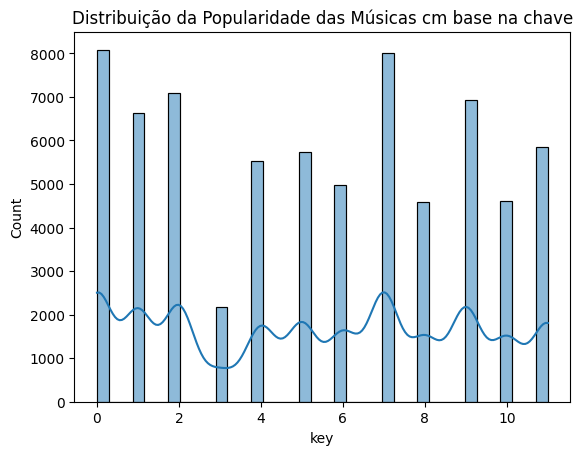

In [39]:
# Exemplo: Visualizar a distribuição da popularidade das músicas
sns.histplot(df['key'], kde=True)
plt.title('Distribuição da Popularidade das Músicas cm base na chave')
plt.show()

### Análise de popularidade com base no gênero

In [40]:
df_sucesso = df[df['popularity_target'] == 1]
genero_sucesso = df_sucesso['track_genre'].value_counts()
pd.set_option('display.max_rows', 112)
genero_sucesso.head(112)

,count
track_genre,
turkish,652
sad,648
indian,647
pop-film,645
chill,630
k-pop,626
anime,599
forro,586
progressive-house,577


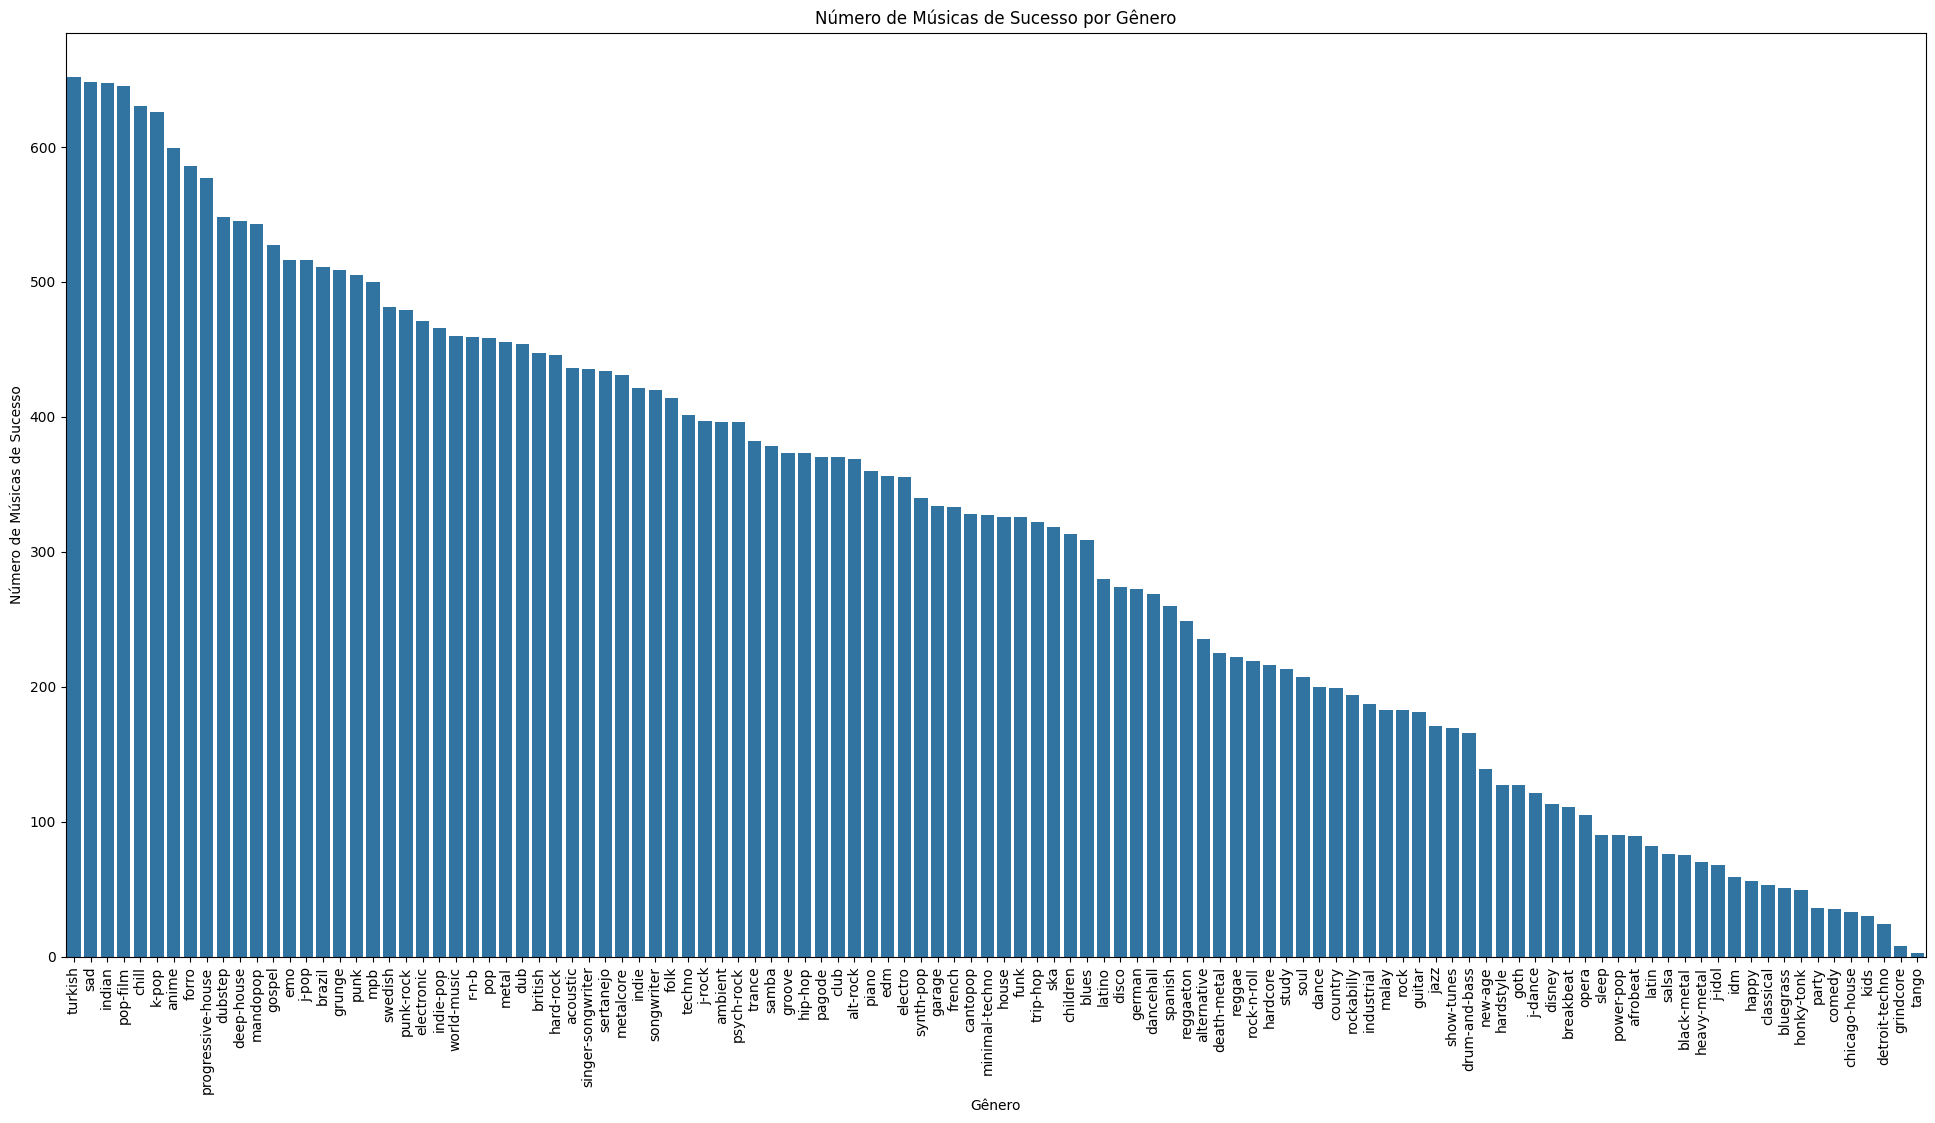

In [41]:
# Criar gráfico de barras para mostrar a contagem de músicas de sucesso por gênero
plt.figure(figsize=(24,12))
sns.barplot(x=genero_sucesso.index, y=genero_sucesso.values)
plt.xticks(rotation=90)  # Rotacionar os rótulos dos gêneros para melhor visualização
plt.title('Número de Músicas de Sucesso por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Número de Músicas de Sucesso')
plt.show()

### Análise de popularidade com base nos artistas

In [42]:
artistas_sucesso = df_sucesso['artists'].value_counts()
artistas_sucesso.head(15000)

,count
artists,
The Beatles,186
Linkin Park,128
Prateek Kuhad,124
BTS,104
Arctic Monkeys,94
...,...
BluntOne;Baen Mow;Phlocalyst,1
Shankar Mahadevan;Shreya Ghoshal,1
Lil Yung Pharaoh,1


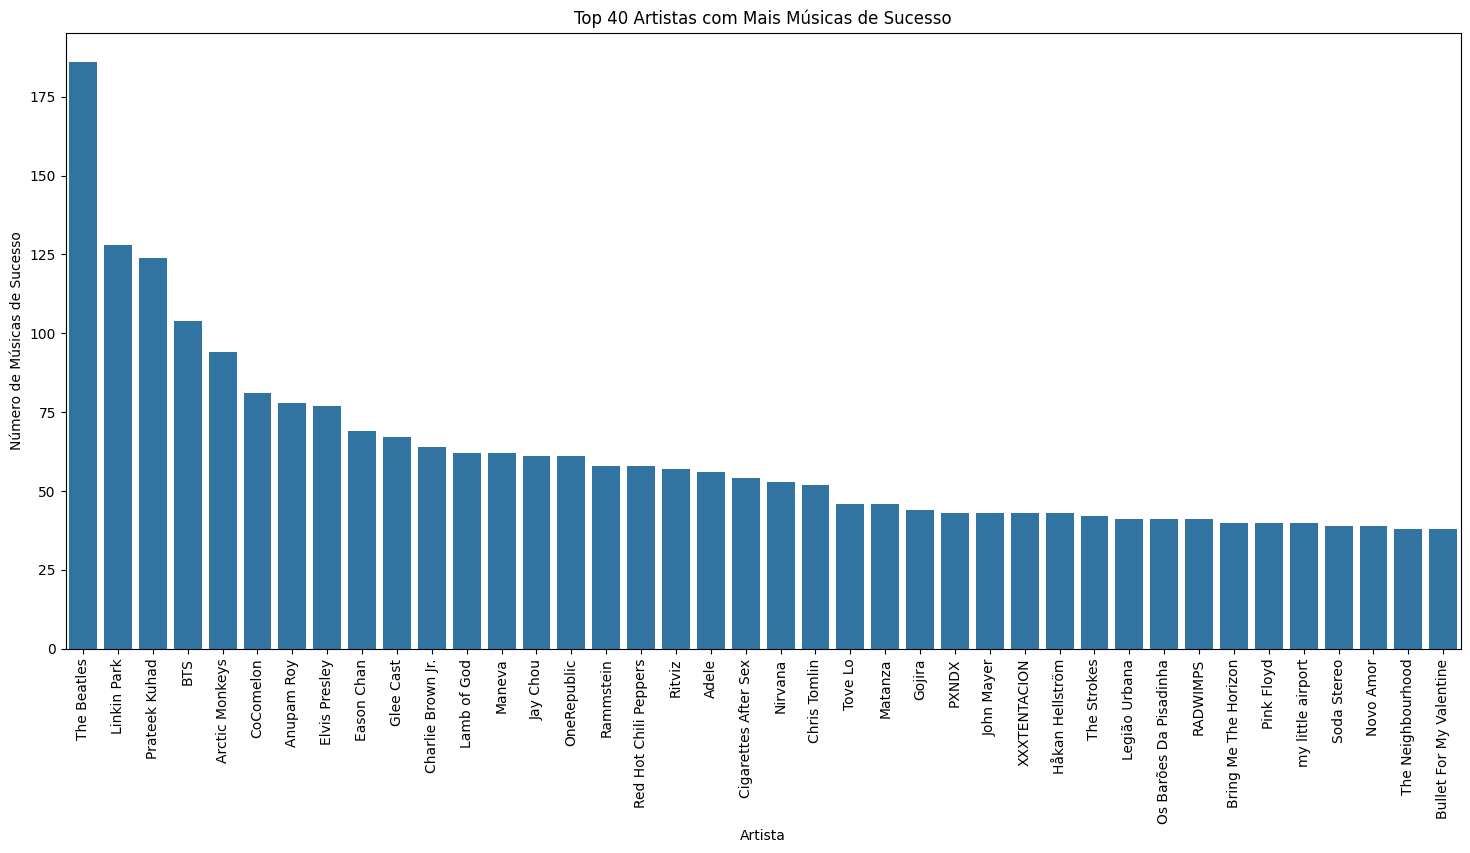

Os 2800 primeiros artistas somam 20405 músicas de sucesso.
Isso representa 58.90% do total de músicas de sucesso.


In [67]:
# Contar o número de músicas de sucesso para cada artista
artistas_sucesso = df_sucesso['artists'].value_counts()

# Selecionar os Top 20 artistas com mais músicas de sucesso
top_20_artistas = artistas_sucesso.head(40)
maioria_musicas = artistas_sucesso.head(2800)

# Somar o número total de músicas dos 20 primeiros artistas
total_musicas_top_2800 = maioria_musicas.sum()

# Número total de músicas no DataFrame de sucesso
total_musicas = df_sucesso.shape[0]

# Calcular a porcentagem
percentual = (total_musicas_top_2800 / total_musicas) * 100

# Plotar gráfico de barras
plt.figure(figsize=(18,8))
sns.barplot(x=top_20_artistas.index, y=top_20_artistas.values)
plt.xticks(rotation=90)
plt.title('Top 40 Artistas com Mais Músicas de Sucesso')
plt.xlabel('Artista')
plt.ylabel('Número de Músicas de Sucesso')
plt.show()

# Exibir os resultados
print(f"Os 2800 primeiros artistas somam {total_musicas_top_2800} músicas de sucesso.")
print(f"Isso representa {percentual:.2f}% do total de músicas de sucesso.")

In [44]:

df['duration_ms'] = df['duration_ms'].astype(float).round(1)
duracaoIdeal = df_sucesso['duration_ms'].value_counts()
duracaoIdeal.head(15)

,count
duration_ms,
3.5,1610
3.6,1572
3.3,1546
3.2,1442
3.8,1416
3.4,1415
3.1,1397
3.7,1354
3.0,1341


### Duração das Músicas por Popularidade

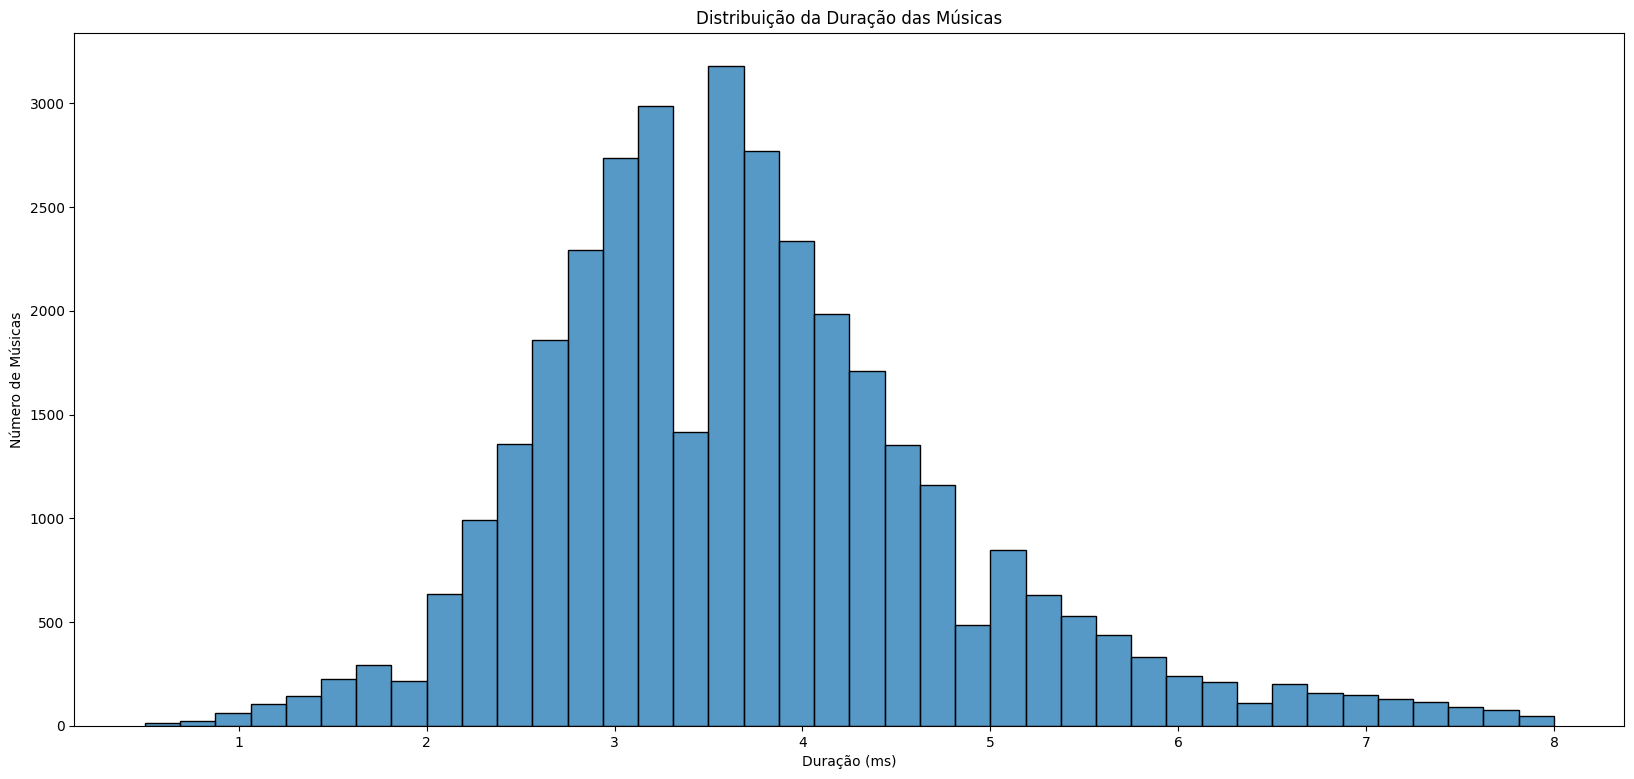

In [45]:
# Ajustar o tamanho da figura
plt.figure(figsize=(20,9))

# Plotar o histograma da duração das músicas
sns.histplot(df_sucesso['duration_ms'], bins=40, kde=False)

# Adicionar título e rótulos
plt.title('Distribuição da Duração das Músicas')
plt.xlabel('Duração (ms)')
plt.ylabel('Número de Músicas')

# Exibir o gráfico
plt.show()

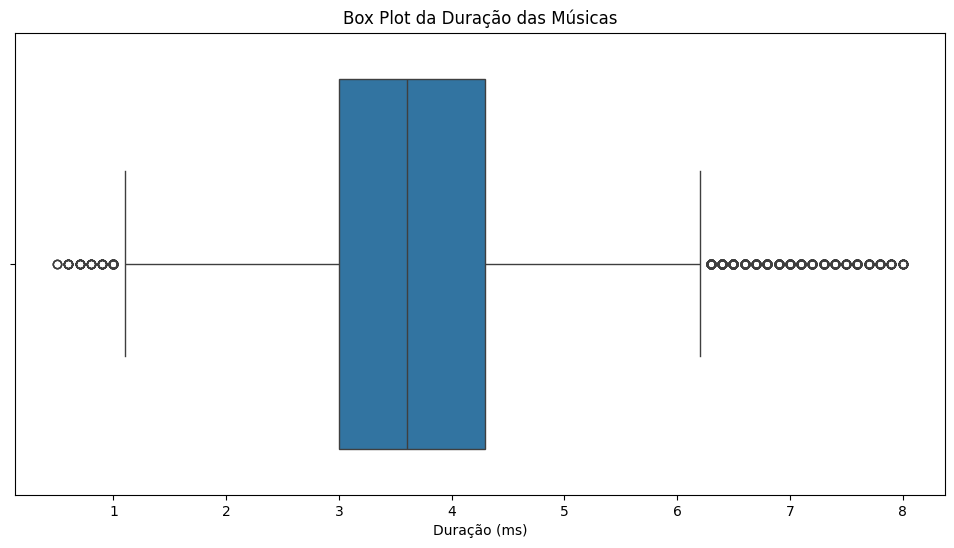

In [46]:
# Ajustar o tamanho da figura
plt.figure(figsize=(12,6))

# Plotar Box Plot para a duração das músicas
sns.boxplot(x=df_sucesso['duration_ms'])

# Adicionar título e rótulos
plt.title('Box Plot da Duração das Músicas')
plt.xlabel('Duração (ms)')

# Exibir o gráfico
plt.show()


### Popularidade por Explícificidade

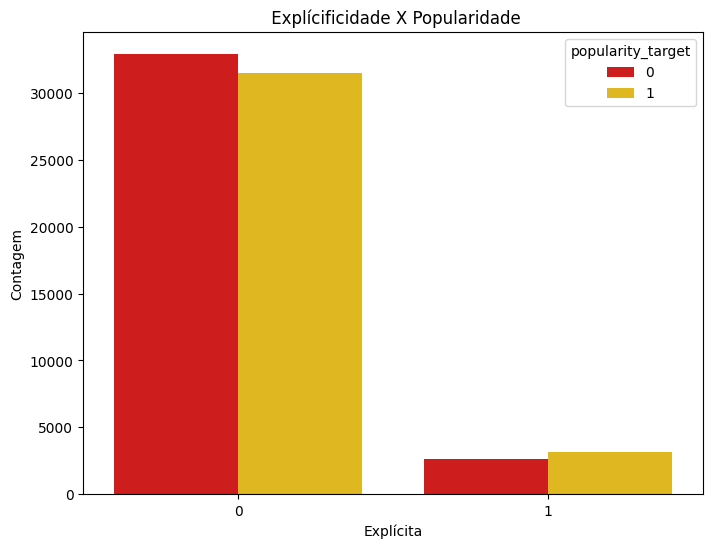

In [48]:
plt.figure(figsize=(8,6))
sns.countplot(x='explicit', hue='popularity_target', data=df, palette='hot')
plt.title(' Explícificidade X Popularidade')
plt.xlabel('Explícita')
plt.ylabel('Contagem')
plt.show()

## Hipóteses

### Hipótese 1: Certos gêneros musicais têm maior probabilidade de gerar músicas de sucesso.
Os gêneros como Turkish, Sad, Indian, Pop-Film, e Chill estão entre os gêneros com o maior número de músicas de sucesso, enquanto gêneros como Tango e Grindcore possuem muito poucas músicas que alcançaram essa categoria. Isso sugere que alguns gêneros são mais propensos a gerar sucessos do que outros. A popularidade pode ser influenciada pela cultura e tendências globais, e certos gêneros estão em alta demanda por públicos específicos.
Essa hipótese pode ser incorporada no modelo preditivo ao utilizar a coluna de gênero como uma variável categórica relevante. Técnicas de codificação (como One-Hot Encoding ou Target Encoding) podem ser usadas para representar os gêneros de forma que o modelo possa aprender a relação entre o gênero e o sucesso da música. Isso permitirá que o modelo identifique tendências e padrões de sucesso com base no gênero musical.

### Hipótese 2: A duração da música influencia diretamente sua popularidade.
Foi observado que mais de 50% das músicas de sucesso têm entre 2.7 minutos e 4.2 minutos. Isso indica que músicas com durações fora desse intervalo podem ter menos chance de se tornarem populares. Isso pode estar relacionado ao tempo de atenção do público e às preferências para streaming em plataformas de música, onde músicas mais curtas tendem a ser mais acessíveis e repetidas pelos ouvintes.
A duração da música pode ser incluída como uma feature contínua no modelo preditivo. Além disso, pode-se criar uma feature binária que identifique se a música está dentro do intervalo ideal de 2.7 a 4.2 minutos. O modelo pode, então, usar essa informação para prever a probabilidade de uma música ser popular, atribuindo maior peso a músicas que caem dentro desse intervalo de duração.

### Hipótese 3: Músicas não explícitas têm maior chance de sucesso.
Os dados indicam que mais de 90% das músicas populares não são explícitas. Isso pode ser explicado pelo fato de que músicas sem conteúdo explícito têm maior aceitação em ambientes públicos, rádios e plataformas de streaming que aplicam filtros para conteúdo adulto, aumentando a exposição dessas músicas a um público mais amplo.

O uso de uma feature binária que indique se uma música é explícita ou não pode ser uma variável importante para o modelo preditivo. Essa informação ajudaria o modelo a aprender que músicas não explícitas têm maior probabilidade de se tornarem populares, especialmente em plataformas que priorizam conteúdos adequados para todos os públicos. Ao treinar o modelo com essa variável, pode-se melhorar a precisão da previsão de sucesso de músicas.

### Hipótese 4: Um pequeno grupo de artistas é responsável pela maioria das músicas de sucesso.
Os 2800 primeiros artistas, que correspondem a apenas 20% do total de artistas, são responsáveis por 58,90% das músicas de sucesso. Isso sugere que existe uma concentração de sucesso em um grupo relativamente pequeno de artistas. Artistas mais conhecidos ou com maior visibilidade na mídia têm mais chances de produzir músicas que alcançam sucesso, enquanto a maioria dos artistas possui menos representatividade no cenário musical popular.
Essa hipótese pode ser usada para criar uma feature de popularidade dos artistas, onde artistas que fazem parte dos 20% mais representativos são marcados com uma feature binária ou categórica. O modelo preditivo pode usar essa informação para identificar que músicas de artistas com maior histórico de sucesso têm maior probabilidade de se tornarem populares.

### Codificação dos artistas e gênero para usar no modelo

In [49]:
# Instanciar o LabelEncoder
le = LabelEncoder()

# Aplicar o LabelEncoder na coluna de artistas
df['artist_encoded'] = le.fit_transform(df['artists'])

# Exibir as primeiras linhas
print(df[['artists', 'artist_encoded']].head())

            artists  artist_encoded
0  Love and Rockets           12185
1  Filippa Giordano            7016
2     Susumu Yokota           19468
4           Scooter           18101
5               BTS            2051


In [50]:
# Instanciar o LabelEncoder
le = LabelEncoder()

# Aplicar o LabelEncoder na coluna de artistas
df['track_genre_encoded'] = le.fit_transform(df['track_genre'])

# Exibir as primeiras linhas
print(df[['track_genre', 'track_genre_encoded']].head())

  track_genre  track_genre_encoded
0        goth                   41
1       opera                   76
2         idm                   54
4      techno                  109
5         pop                   80


### Matriz de correlação

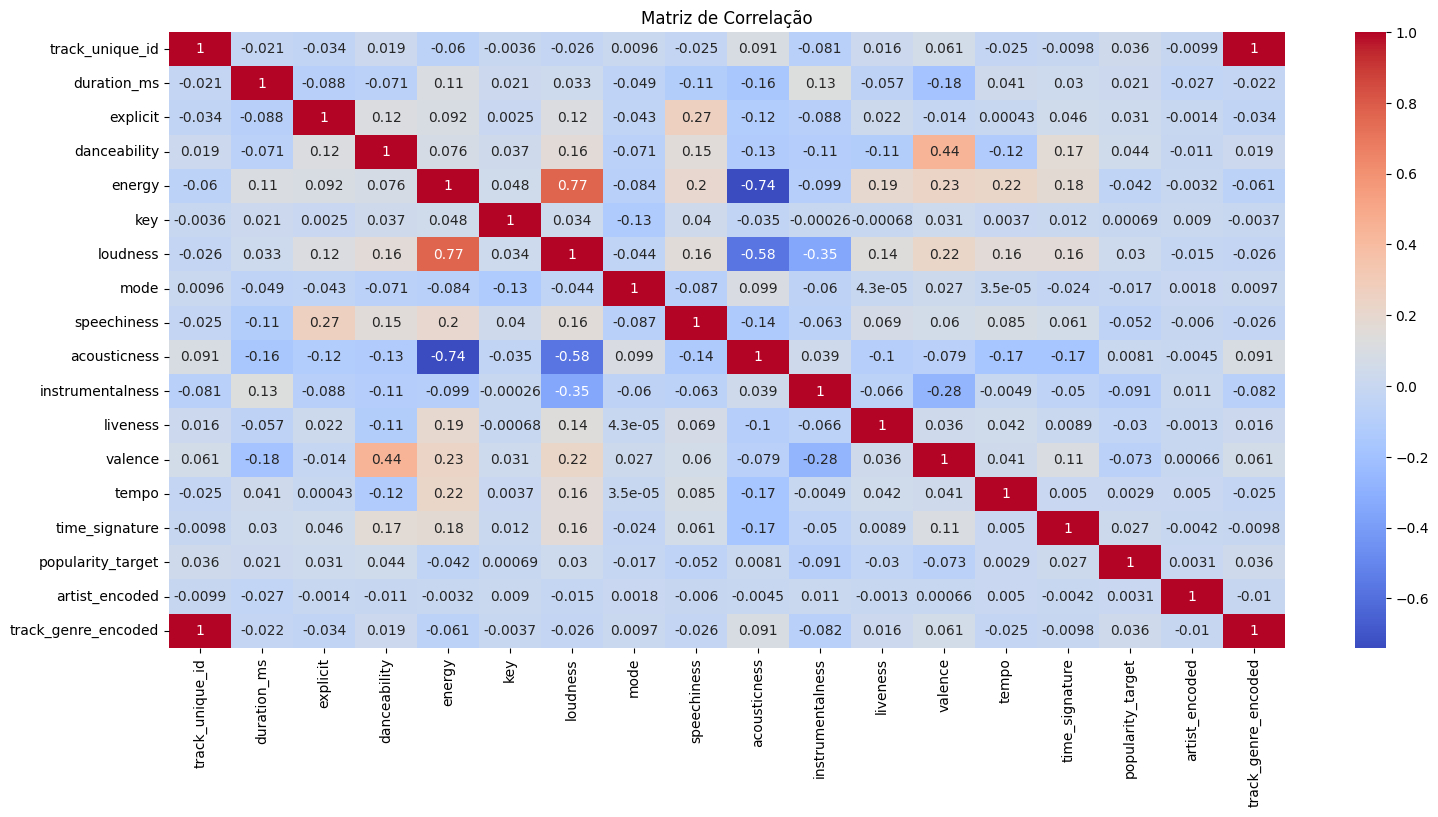

In [51]:
# Matriz de correlação
correlation_matrix = df.select_dtypes(include=['number']).corr()

# Ajustar o tamanho da figura
plt.figure(figsize=(18,8))

# Criar o heatmap de correlação
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Título do gráfico
plt.title('Matriz de Correlação')

# Mostrar o gráfico
plt.show()

#Modelo Preditivo
##Random Forest
O Random Forest é um algoritmo de aprendizado de máquina do tipo ensemble, utilizado tanto para tarefas de classificação quanto de regressão. Ele funciona criando uma "floresta" composta por várias árvores de decisão independentes, sendo uma extensão do algoritmo de árvore de decisão.

Cada árvore na floresta é construída a partir de uma amostra aleatória do conjunto de dados (bootstrap), e em cada nó da árvore, é considerada uma amostra aleatória de features para determinar a melhor divisão. Essa aleatoriedade reduz a correlação entre as árvores e melhora a generalização do modelo.

O resultado final de um modelo Random Forest é obtido através da votação majoritária no caso de classificação, ou da média das previsões no caso de regressão. O algoritmo é conhecido por ser robusto contra overfitting, pois combina múltiplos modelos simples (árvores de decisão), cada um com baixa correlação, para formar uma previsão mais precisa e estável.

Além disso, o Random Forest oferece uma métrica de importância das features, permitindo avaliar quais variáveis têm maior impacto nas previsões.

In [54]:
# Features
X = df[['danceability', 'energy', 'artist_encoded', 'track_genre_encoded','duration_ms']]

# Variável alvo
y = df['popularity_target']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf = DecisionTreeClassifier(criterion='entropy',
                             max_depth=None,
                             max_features=None,
                             min_samples_leaf=1,
                             min_samples_split=3,
                             random_state=42)
clf.fit(X_train, y_train)
# Previsões
y_pred = clf.predict(X_test)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Formatação do print
print(f"--- Avaliação do Modelo ---")
print(f"Accuracy: {accuracy:.2f}\n")
print("Matriz de Confusão:")
print(pd.DataFrame(conf_matrix, index=['Real: Não Sucesso', 'Real: Sucesso'],
                   columns=['Previsto: Não Sucesso', 'Previsto: Sucesso']))
print("\nRelatório de Classificação:")
print(class_report)

--- Avaliação do Modelo ---
Accuracy: 0.76

Matriz de Confusão:
                   Previsto: Não Sucesso  Previsto: Sucesso
Real: Não Sucesso                   8324               2232
Real: Sucesso                       2805               7701

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.75      0.79      0.77     10556
           1       0.78      0.73      0.75     10506

    accuracy                           0.76     21062
   macro avg       0.76      0.76      0.76     21062
weighted avg       0.76      0.76      0.76     21062



## Análise dos Resultados
### Importância das Features para o resultado

In [56]:
# Ver as importâncias das features
importances = clf.feature_importances_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
print(feature_importance.sort_values(by='Importance', ascending=False))

               Feature  Importance
3  track_genre_encoded    0.271624
2       artist_encoded    0.237251
0         danceability    0.183483
1               energy    0.181277
4          duration_ms    0.126365


### Matriz de confusão
Essa matriz permite analisar os erros e acertos do modelo

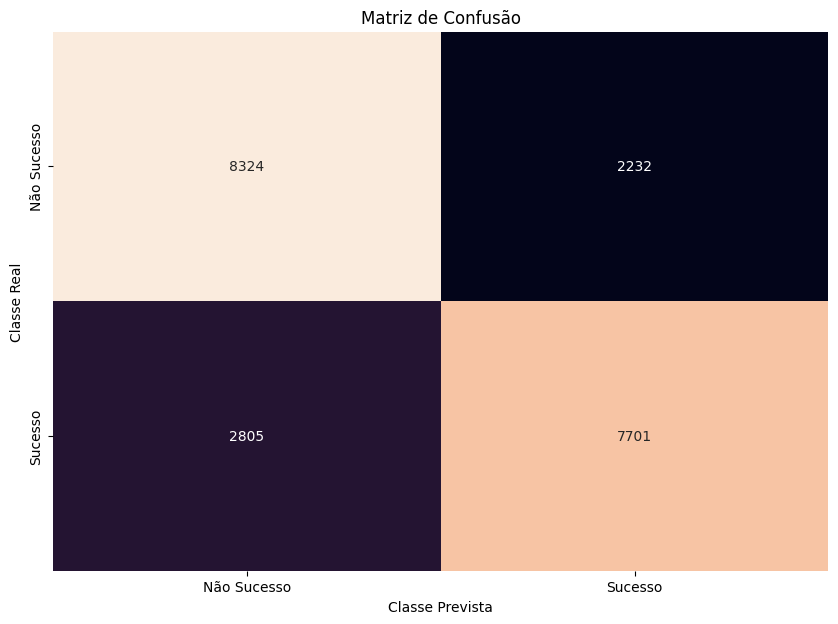

<ipython-input-57-45b01081bf14>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_pred, palette='pastel')


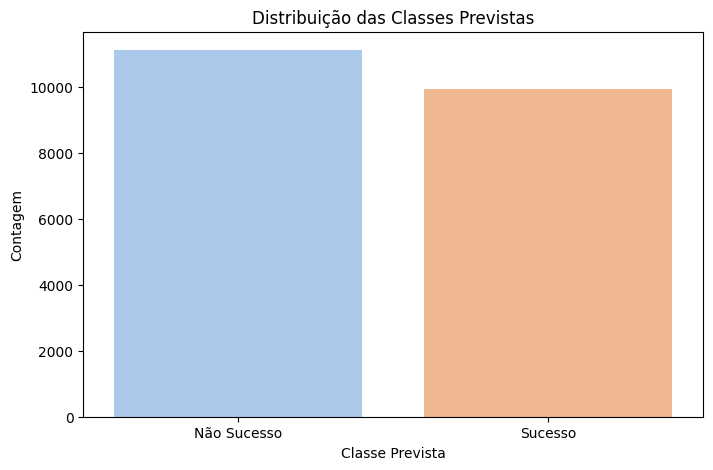

In [57]:
# Gráfico da Matriz de Confusão
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cbar=False,
            xticklabels=['Não Sucesso', 'Sucesso'], yticklabels=['Não Sucesso', 'Sucesso'])
plt.title('Matriz de Confusão')
plt.xlabel('Classe Prevista')
plt.ylabel('Classe Real')
plt.show()

# Gráfico da Distribuição das Classes Previstas
plt.figure(figsize=(8, 5))
sns.countplot(x=y_pred, palette='pastel')
plt.title('Distribuição das Classes Previstas')
plt.xlabel('Classe Prevista')
plt.ylabel('Contagem')
plt.xticks(ticks=[0, 1], labels=['Não Sucesso', 'Sucesso'])
plt.show()

## Seleção das Melhores Features

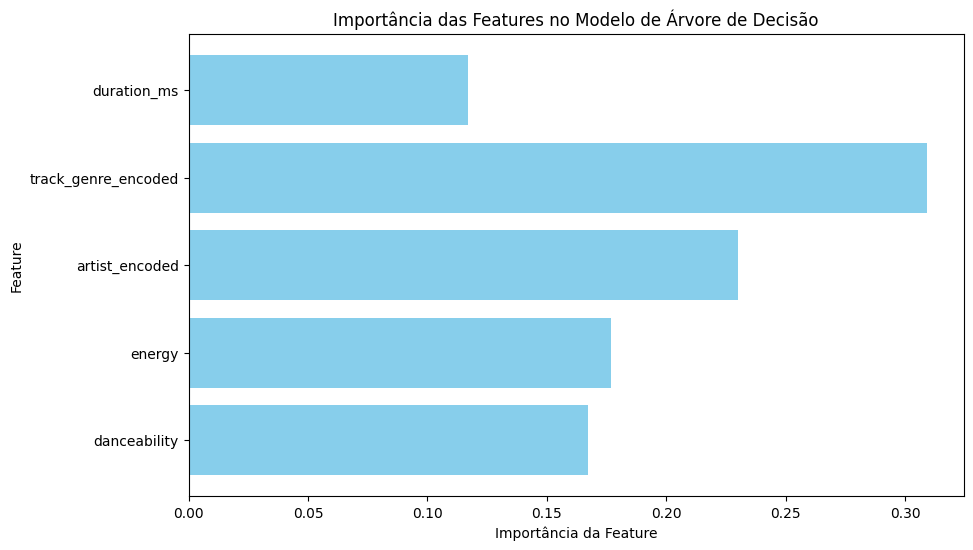

In [58]:
# Treinar modelo de árvore de decisão
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Importância das features
feature_importances = clf.feature_importances_

# Exibir as importâncias
plt.figure(figsize=(10, 6))
plt.barh(X_train.columns, feature_importances, color='skyblue')
plt.xlabel("Importância da Feature")
plt.ylabel("Feature")
plt.title("Importância das Features no Modelo de Árvore de Decisão")
plt.show()

In [59]:
# Aplicando RFE
rfe = RFE(estimator=clf, n_features_to_select=5)
rfe.fit(X_train, y_train)

# Exibir as melhores features selecionadas
selected_features = X_train.columns[rfe.support_]
print("Features selecionadas pelo RFE:", selected_features.tolist())


Features selecionadas pelo RFE: ['danceability', 'energy', 'artist_encoded', 'track_genre_encoded', 'duration_ms']


In [60]:
# Aplicar o SelectKBest para selecionar as 10 melhores features
bestfeatures = SelectKBest(score_func=chi2, k=10)

# Convertendo valores negativos para zero usando a função clip
X_train_non_negative = X_train.clip(lower=0)

fit = bestfeatures.fit(X_train_non_negative, y_train)

# Exibir as melhores features selecionadas
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X_train.columns)
feature_scores = pd.concat([df_columns, df_scores], axis=1)
feature_scores.columns = ['Feature', 'Score']
print("Melhores features selecionadas pelo SelectKBest:")
print(feature_scores.nlargest(10, 'Score'))

Melhores features selecionadas pelo SelectKBest:
               Feature         Score
2       artist_encoded  15152.609291
3  track_genre_encoded    927.749588
1               energy      9.098141
4          duration_ms      8.465575
0         danceability      4.592497


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:776: UserWarning: k=10 is greater than n_features=5. All the features will be returned.
  warnings.warn(


In [61]:
# Avaliação com validação cruzada
scores_full = cross_val_score(clf, X_train, y_train, cv=5)
print(f"Acurácia média com todas as features: {scores_full.mean():.2f}")

# Remova features menos importantes e teste novamente
reduced_X_train = X_train[['danceability', 'energy', 'artist_encoded', 'track_genre_encoded']]  # Substitua por suas features selecionadas
clf.fit(reduced_X_train, y_train)
reduced_scores = cross_val_score(clf, reduced_X_train, y_train, cv=5)
print(f"Acurácia média com features selecionadas: {reduced_scores.mean():.2f}")

Acurácia média com todas as features: 0.74
Acurácia média com features selecionadas: 0.75


## Hiperparâmetros
Hiperparâmetros no Random Forest
Os hiperparâmetros do Random Forest controlam como as árvores individuais são construídas e como a floresta funciona de forma geral.:

**n_estimators:** Define o número de árvores na floresta. Mais árvores geralmente resultam em um melhor desempenho, mas aumentam o tempo de treinamento.

**max_depth:** Limita a profundidade máxima de cada árvore. Controlar a profundidade ajuda a evitar que as árvores se tornem muito complexas, o que poderia levar ao overfitting.

**min_samples_split:** Define o número mínimo de amostras necessárias para dividir um nó. Valores maiores reduzem a complexidade das árvores.

**min_samples_leaf:** Estabelece o número mínimo de amostras necessárias em um nó folha. Isso também ajuda a controlar o overfitting, garantindo que as folhas não fiquem com muito poucas amostras.

**max_features:** Controla o número máximo de features consideradas para dividir cada nó. A escolha das features afeta diretamente a variância e o desempenho do modelo.

**criterion**: Usa gini(índice de Gini) para avaliar a impureza das divisões. O índice de Gini mede o quão frequentemente um item escolhido aleatoriamente seria classificado incorretamente ou entropy(entropia da teoria da informação) que  mede a desordem ou incerteza nas classes. A árvore tenta minimizar a entropia, ou seja, fazer as classes o mais puras possível a cada divisão.

In [62]:
# Definir os hiperparâmetros a serem testados
param_grid = {
    'max_depth': [1,2,3,5, None],
    'min_samples_split': [1,2,3,4],
    'min_samples_leaf': [1,2,3],
    'max_features': [None, 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

# Instanciar o modelo de árvore de decisão
clf = DecisionTreeClassifier()

# Aplicar o GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')

# Treinar o modelo com o GridSearchCV
grid_search.fit(X_train, y_train)

# Exibir os melhores hiperparâmetros
print("Melhores hiperparâmetros:", grid_search.best_params_)
print("Melhor acurácia obtida:", grid_search.best_score_)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
450 fits failed out of a total of 1800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
450 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/uti

Melhores hiperparâmetros: {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Melhor acurácia obtida: 0.7420996144365765


## Exportação do resultado do teste

In [63]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

# Concatenar os datasets
df_test['popularity_target'] = -1  # Marcador para o conjunto de teste
df_concat = pd.concat([df_train, df_test])

# Instanciar o LabelEncoder
le = LabelEncoder()

# Aplicar o LabelEncoder nas colunas de 'artists' e 'track_genre'
df_concat['artist_encoded'] = le.fit_transform(df_concat['artists'])
df_concat['track_genre_encoded'] = le.fit_transform(df_concat['track_genre'])

# Separar os DataFrames novamente
df_train_encoded = df_concat[df_concat['popularity_target'] != -1]
df_test_encoded = df_concat[df_concat['popularity_target'] == -1]

# Separar as features e a variável alvo no conjunto de treino
X_train = df_train_encoded[['danceability', 'energy', 'artist_encoded', 'track_genre_encoded','duration_ms']]
y_train = df_train_encoded['popularity_target']

# Treinar o modelo com os hiperparâmetros ajustados
clf = DecisionTreeClassifier(criterion='entropy', max_depth=None, max_features=None,
                             min_samples_leaf=1, min_samples_split=3, random_state=42)
clf.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
X_test = df_test_encoded[['danceability', 'energy', 'artist_encoded', 'track_genre_encoded','duration_ms']]
df_test_encoded['popularity_target'] = clf.predict(X_test)

# Criar o arquivo CSV com os IDs das músicas e as previsões
df_test_encoded[['track_unique_id', 'popularity_target']].to_csv('predicao.csv', index=False)

<ipython-input-63-279493036016>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_encoded['popularity_target'] = clf.predict(X_test)
